In [6]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
#消除以前的图
tf.reset_default_graph()

# 训练多少批次=训练集的个数//批次的大小
batch_size = 128
n_batch = mnist.train.num_examples // batch_size

#none代表任何值，随批次的大小变化
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [3]:
#模型的创建
#第一层
#从截断的正态分布中输出随机值。
W1 = tf.Variable(tf.truncated_normal([784,2000],stddev=0.1))
b1 = tf.Variable(tf.zeros([1, 2000]))
# 激活层
layer1 = tf.nn.relu(tf.matmul(x,W1) + b1)
# drop层
layer1 = tf.nn.dropout(layer1,keep_prob=keep_prob)

#第二层
W2 = tf.Variable(tf.truncated_normal([2000,500],stddev=0.1))
b2 = tf.Variable(tf.zeros([1, 500]))
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(layer2,keep_prob=keep_prob)

# 第三层
W3 = tf.Variable(tf.truncated_normal([500,10],stddev=0.1))
b3 = tf.Variable(tf.zeros([1,10]))
prediction = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
#训练模型
# 梯度下降法，0.2的学习率，loss初始化变量
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=prediction))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 计算准确率
prediction_2 = tf.nn.softmax(prediction)
##预测的标签是否与真实的标签一致
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction_2,1)) #argmax 返回一维张量中最大值索引
# 求准确率，cast把布尔型转化为浮点型，再求平均值，比如有9个1就说明9个是正确的。
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) # 把布尔值转换为浮点型求平均数

In [11]:
saver=tf.train.Saver()    

#创建会话
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0}))

saver.restore(sess,'three/my_net.ckpt')             # #调用模型
print(sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0}))

FailedPreconditionError: Attempting to use uninitialized value Variable_5
	 [[node Variable_5/read (defined at <ipython-input-3-7fdb0e0df0c7>:19) ]]

Caused by op 'Variable_5/read', defined at:
  File "E:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "E:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "E:\Anaconda\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "E:\Anaconda\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "E:\Anaconda\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "E:\Anaconda\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "E:\Anaconda\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "E:\Anaconda\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "E:\Anaconda\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "E:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "E:\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "E:\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "E:\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "E:\Anaconda\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-7fdb0e0df0c7>", line 19, in <module>
    b3 = tf.Variable(tf.zeros([1,10]))
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 1395, in __init__
    constraint=constraint)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "E:\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4537, in identity
    "Identity", input=input, name=name)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "E:\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_5
	 [[node Variable_5/read (defined at <ipython-input-3-7fdb0e0df0c7>:19) ]]


In [8]:
import numpy as np
import pylab
%matplotlib inline

i=100
image=mnist.test.images[i].reshape((1,784))
print("真实的标签：",np.argmax(mnist.test.labels[i]))

真实的标签： 6


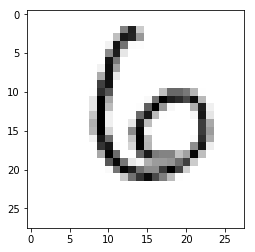

In [10]:
pylab.imshow(mnist.test.images[100].reshape((28,28)), cmap=pylab.cm.gray_r) 

In [12]:
layer1 = tf.nn.relu(tf.matmul(image,W1) + b1)
layer1 = tf.nn.dropout(layer1,keep_prob=keep_prob)
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(layer2,keep_prob=keep_prob)
prediction = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)
print(prediction)
prediction_2 = tf.nn.softmax(prediction)
print(prediction_2)


Tensor("Sigmoid_3:0", shape=(1, 10), dtype=float32)
Tensor("Softmax_3:0", shape=(1, 10), dtype=float32)
